In [1]:
from src.helper import get_split_data

In [2]:
X_trn, y_trn, X_val, y_val, X_tst, y_tst = get_split_data.split_data_for_training()

In [3]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(random_state=42)
rf.fit(X_trn, y_trn)
rf.score(X_tst, y_tst)

0.8

In [4]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [5]:
print(rf.estimators_[0])

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)


[Text(0.5, 0.875, 'aggression_difference <= 15.014\ngini = 0.498\nsamples = 1887\nvalue = [1571, 1383]\nclass = home_not_win'),
 Text(0.25, 0.625, 'acceleration_difference <= 2.996\ngini = 0.496\nsamples = 1727\nvalue = [1473, 1233]\nclass = home_not_win'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'home_last_team_shoton <= 7.5\ngini = 0.476\nsamples = 1122\nvalue = [1077, 691]\nclass = home_not_win'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'points_home <= 35.5\ngini = 0.488\nsamples = 605\nvalue = [396, 542]\nclass = home_win'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'team_strength_home <= 75.604\ngini = 0.478\nsamples = 160\nvalue = [98, 150]\nclass = home_win'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'aggression_difference <= 17.382\ngini = 0.497\nsamples = 110\nvalue = [78, 90]\nclass = home_win'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.68

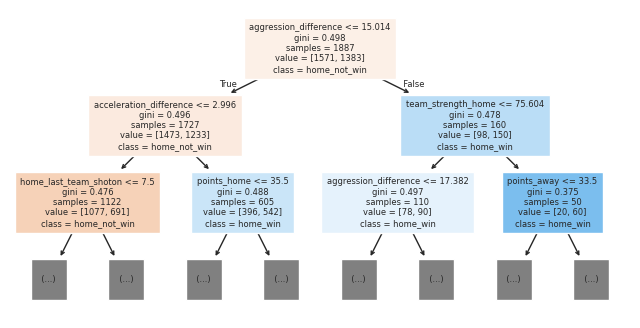

In [6]:
from matplotlib import pyplot as plt
from sklearn import  tree

class_names_str = ['home_win' if cls == 1 else 'home_not_win' for cls in rf.classes_]

fig, ax = plt.subplots(figsize=(8, 4))
features = list(c for c in X_trn.columns)
tree.plot_tree(rf.estimators_[0], feature_names=features,
filled=True, class_names=class_names_str, ax=ax,
max_depth=2, fontsize=6)

In [7]:
import xgboost as xgb
rf_xg = xgb.XGBRFClassifier(random_state=42)
rf_xg.fit(X_trn, y_trn)
rf_xg.score(X_tst, y_tst)

0.8

In [8]:
rf_xg.get_params()

{'colsample_bynode': 0.8,
 'learning_rate': 1.0,
 'reg_lambda': 1e-05,
 'subsample': 0.8,
 'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

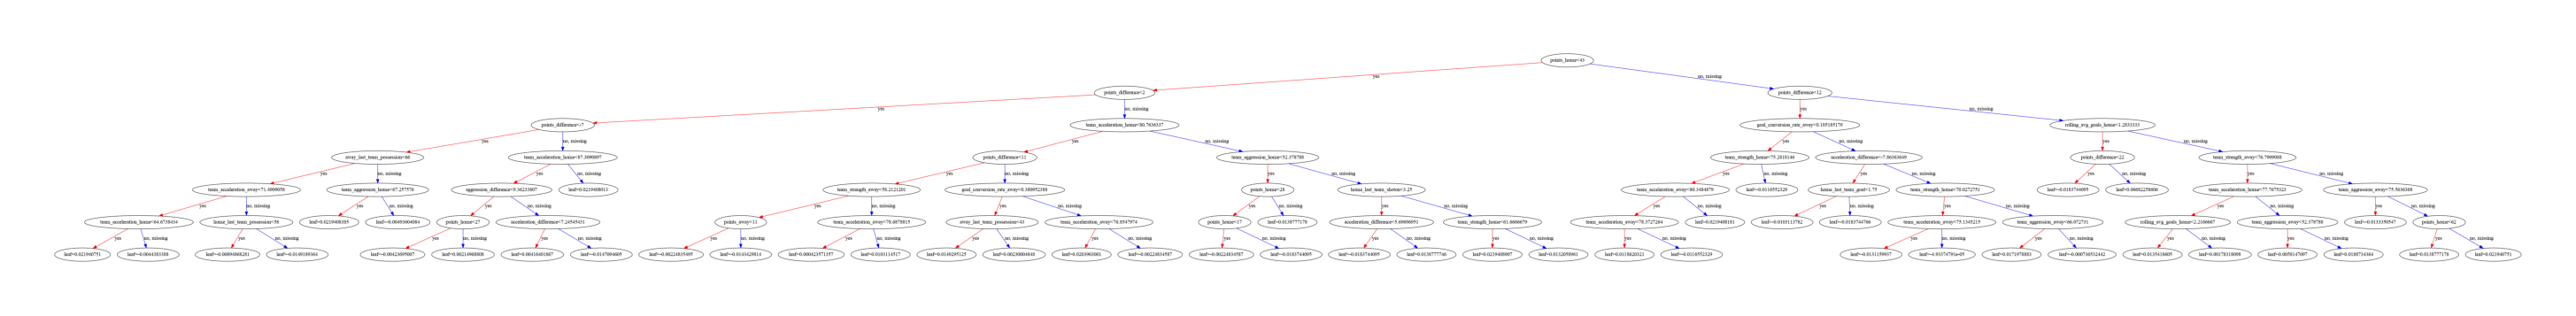

In [9]:
from src.helper.plot_tree import my_dot_export

fig, ax = plt.subplots(figsize=(6,12), dpi=600)
xgb.plot_tree(rf_xg, num_trees=0, ax=ax, size='1,1')
my_dot_export(rf_xg, num_trees=0, filename='img/rf_xg_kag.dot',
title='First Random Forest Tree', direction='LR')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

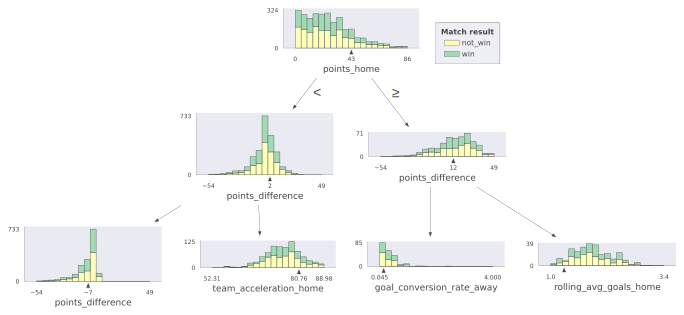

In [10]:
import dtreeviz

viz = dtreeviz.model(rf_xg, X_train=X_trn.dropna(axis=0), y_train=y_trn, target_name='Match result', feature_names=list(X_trn.columns), class_names=['not_win', 'win'], tree_index=0)
viz.view(depth_range_to_display=[0,2])

In [11]:
import numpy as np
def inv_logit(p: float) -> float:
    """
    Compute the inverse logit function of a given value.
    The inverse logit function is defined as:
    f(p) = exp(p) / (1 + exp(p))
    Parameters
    ----------
    p : float
    The input value to the inverse logit function.
    Returns
    -------
    float
    The output of the inverse logit function.
    """
    return np.exp(p) / (1 + np.exp(p))

In [12]:
inv_logit(0.375)

np.float64(0.5926665999540698)